# AI Benchmark Leaderboards 2025

**Jean Fernandes**

## Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading the data

In [5]:
df_benchmarks = pd.read_csv("data/benchmarks_2025.csv")
df_efficiency = pd.read_csv("data/efficiency_2025.csv")
df_metadata = pd.read_csv("data/metadata_models.csv")

display(df_benchmarks, df_efficiency, df_metadata) 

,Model,Provider,Benchmark,Score,Unit,Rank,Date,Source,Notes
0,GPT-5,OpenAI,Humanity’s Last Exam,25.32,%,1,2025-08-10,Wikipedia,Calibration error 50
1,Gemini 2.5 Pro Preview,Google DeepMind,Humanity’s Last Exam,21.64,%,2,2025-08-10,Wikipedia,Calibration error 72
2,Qwen3-235B-Thinking,Alibaba,Humanity’s Last Exam,15.43,%,4,2025-08-10,Wikipedia,Calibration error 78
3,Claude 4.1 Opus (Thinking),Anthropic,Humanity’s Last Exam,11.52,%,5,2025-08-10,Wikipedia,Calibration error 71
4,o3-mini (high),OpenAI,Humanity’s Last Exam,13.37,%,6,2025-08-10,Wikipedia,Calibration error 80
5,Gemini 2.5 Pro Exp,Google DeepMind,MMLU-Pro,84.10,%,1,2025-04-15,vals.ai,Reasoning-heavy benchmark
6,o1,OpenAI,MMLU-Pro,83.50,%,2,2025-04-15,vals.ai,Competitive with Gemini
7,Gemini 2.0 Flash,Google DeepMind,MMLU-Pro,77.40,%,3,2025-04-15,vals.ai,Strong price-performance


,Model,Provider,Metric,Value,Unit,Source
0,GPT-5,OpenAI,Max Context Length,256000.0,tokens,Vellum.ai
1,Gemini 2.0 Flash,Google DeepMind,Latency,200.0,ms/token,Vellum.ai
2,Claude 4.1 Opus,Anthropic,Cost,15.0,$/1M tokens,API Docs


,Model,Provider,Release_Date,Size_Params,Modality
0,GPT-5,OpenAI,2025-08,undisclosed,text + vision
1,Gemini 2.5 Pro Exp,Google DeepMind,2025-04,undisclosed,text + vision
2,Claude 4.1 Opus,Anthropic,2025-06,undisclosed,text-only (long context)
3,Qwen3-235B,Alibaba,2025-07,235B,text-only
4,o3-mini (high),OpenAI,2025-08,undisclosed,text-only


In [6]:
df_benchmarks.info()
df_efficiency.info()
df_metadata.info()

# Basic stats per benchmark
df_benchmarks.groupby("Benchmark")["Score"].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Model      8 non-null      object 
 1   Provider   8 non-null      object 
 2   Benchmark  8 non-null      object 
 3   Score      8 non-null      float64
 4   Unit       8 non-null      object 
 5   Rank       8 non-null      int64  
 6   Date       8 non-null      object 
 7   Source     8 non-null      object 
 8   Notes      8 non-null      object 
dtypes: float64(1), int64(1), object(7)
memory usage: 708.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Model     3 non-null      object 
 1   Provider  3 non-null      object 
 2   Metric    3 non-null      object 
 3   Value     3 non-null      float64
 4   Unit      3 non-null      object 
 5   Source    3 non

,count,mean,std,min,25%,50%,75%,max
Benchmark,,,,,,,,
Humanity’s Last Exam,5.0,17.456000,5.817743,11.52,13.37,15.43,21.64,25.32
MMLU-Pro,3.0,81.666667,3.707200,77.40,80.45,83.50,83.80,84.10


In [7]:
print("Benchmarks:", df_benchmarks["Benchmark"].unique())
print("Models:", df_benchmarks["Model"].unique())

Benchmarks: ['Humanity’s Last Exam' 'MMLU-Pro']
Models: ['GPT-5' 'Gemini 2.5 Pro Preview' 'Qwen3-235B-Thinking'
 'Claude 4.1 Opus (Thinking)' 'o3-mini (high)' 'Gemini 2.5 Pro Exp' 'o1'
 'Gemini 2.0 Flash']


In [8]:
# Missing values -JF
df_benchmarks.isna().sum()
df_efficiency.isna().sum()
df_metadata.isna().sum()

Model           0
Provider        0
Release_Date    0
Size_Params     0
Modality        0
dtype: int64

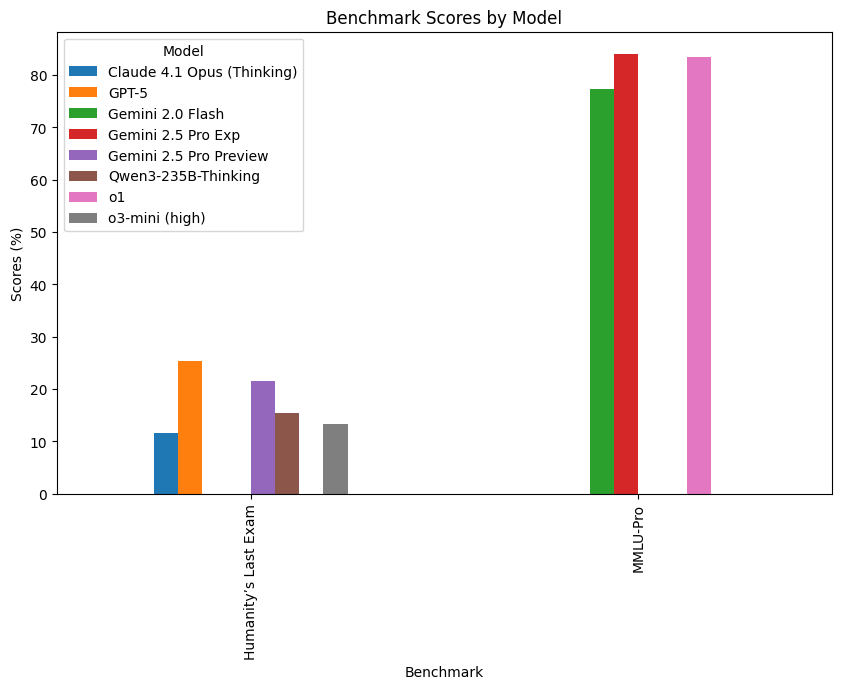

In [9]:
# Bar plot: Scores by Benchmark
df_benchmarks.groupby(["Benchmark", "Model"])["Score"].mean().unstack().plot(kind="bar", figsize=(10, 6))
plt.title("Benchmark Scores by Model")
plt.ylabel("Scores (%)")
plt.show()